In [3]:
import os, sys
import pandas as pd
import numpy as np
import math

# Question 1

In [93]:
sigma = np.array([[1.0, 0.5, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], 
                  [0.5, 1.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
                  [0.1, 0.1, 1.0, 0.5, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], 
                  [0.1, 0.1, 0.5, 1.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
                  [0.1, 0.1, 0.1, 0.1, 1.0, 0.5, 0.1, 0.1, 0.1, 0.1], 
                  [0.1, 0.1, 0.1, 0.1, 0.5, 1.0, 0.1, 0.1, 0.1, 0.1],
                  [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1.0, 0.5, 0.1, 0.1], 
                  [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.5, 1.0, 0.1, 0.1],
                  [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1.0, 0.5], 
                  [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.5, 1.0]])

from sklearn.decomposition import PCA

pca = PCA(n_components=0.95).fit(sigma)
display(pca.n_components_)
display(pca.transform(sigma))

# (a)

8

array([[ 1.68296787e-16, -3.34927541e-17,  1.22609929e-17,
         8.22192192e-01, -2.21084180e-17, -1.60598107e-17,
         2.01598171e-18,  1.36688816e-17],
       [-2.34159059e-16,  2.20183971e-17, -5.71279462e-17,
         8.22192192e-01, -8.23063018e-18,  6.02680222e-17,
        -1.18618061e-17, -2.08906189e-19],
       [-1.88760368e-01, -3.65605617e-01,  6.81507194e-01,
        -2.05548048e-01, -4.43268940e-02, -2.93800515e-01,
         1.46875823e-02, -1.91051457e-01],
       [-1.88760368e-01, -3.65605617e-01,  6.81507194e-01,
        -2.05548048e-01,  4.43268940e-02,  2.93800515e-01,
        -1.46875823e-02,  1.91051457e-01],
       [-5.13335854e-01, -2.16881750e-01, -5.68505592e-01,
        -2.05548048e-01,  3.15357038e-01, -5.84037250e-02,
         1.46155842e-01,  2.78821346e-02],
       [-5.13335854e-01, -2.16881750e-01, -5.68505592e-01,
        -2.05548048e-01, -3.15357038e-01,  5.84037250e-02,
        -1.46155842e-01, -2.78821346e-02],
       [-3.58538618e-02,  7.885610

In [128]:
from factor_analyzer import FactorAnalyzer

corr_df = pd.DataFrame(sigma, columns=list(range(10)), index=list(range(10)))

for fac_num in range(2, 7):
    fa = FactorAnalyzer(rotation=None, n_factors=fac_num, is_corr_matrix=True) 
    fa.fit(corr_df)
    loadings = fa.loadings_
    reconstructed_cov = np.dot(loadings, loadings.T)
    for m in range(10):
        reconstructed_cov[m][m] = 1
    print(f"Number of Factor: {fac_num}")
    display(reconstructed_cov)

# (b)
# It is a good choice to set number as 5 to represent the orginial correlation.

Number of Factor: 2


array([[1.        , 0.12195687, 0.15652713, 0.15652713, 0.15653111,
        0.15653112, 0.12195687, 0.12195687, 0.12195687, 0.12195687],
       [0.12195687, 1.        , 0.15652713, 0.15652713, 0.15653111,
        0.15653112, 0.12195687, 0.12195687, 0.12195687, 0.12195687],
       [0.15652713, 0.15652713, 1.        , 0.36787594, 0.03393452,
        0.03393452, 0.15652713, 0.15652713, 0.15652713, 0.15652713],
       [0.15652713, 0.15652713, 0.36787594, 1.        , 0.03393452,
        0.03393451, 0.15652713, 0.15652713, 0.15652713, 0.15652713],
       [0.15653111, 0.15653111, 0.03393452, 0.03393452, 1.        ,
        0.36786263, 0.15653111, 0.15653111, 0.15653111, 0.15653111],
       [0.15653112, 0.15653112, 0.03393452, 0.03393451, 0.36786263,
        1.        , 0.15653112, 0.15653112, 0.15653111, 0.15653112],
       [0.12195687, 0.12195687, 0.15652713, 0.15652713, 0.15653111,
        0.15653112, 1.        , 0.12195687, 0.12195686, 0.12195687],
       [0.12195687, 0.12195687, 0.1565271

Number of Factor: 3


/usr/local/lib/python3.10/dist-packages/factor_analyzer/factor_analyzer.py:574: UserWarning: Failed to converge: ABNORMAL_TERMINATION_IN_LNSRCH
  warnings.warn(f"Failed to converge: {res.message}")


array([[1.        , 0.3799505 , 0.1       , 0.1       , 0.1       ,
        0.1       , 0.1       , 0.1       , 0.1       , 0.1       ],
       [0.3799505 , 1.        , 0.1       , 0.1       , 0.1       ,
        0.1       , 0.1       , 0.1       , 0.1       , 0.1       ],
       [0.1       , 0.1       , 1.        , 0.26033186, 0.22349285,
        0.22349285, 0.05378712, 0.05378712, 0.14233866, 0.14233866],
       [0.1       , 0.1       , 0.26033186, 1.        , 0.22349285,
        0.22349285, 0.05378712, 0.05378712, 0.14233866, 0.14233866],
       [0.1       , 0.1       , 0.22349285, 0.22349285, 1.        ,
        0.20167542, 0.10116934, 0.10116934, 0.15361288, 0.15361288],
       [0.1       , 0.1       , 0.22349285, 0.22349285, 0.20167542,
        1.        , 0.10116934, 0.10116934, 0.15361288, 0.15361288],
       [0.1       , 0.1       , 0.05378712, 0.05378712, 0.10116934,
        0.10116934, 1.        , 0.3194444 , 0.20554964, 0.20554964],
       [0.1       , 0.1       , 0.0537871

Number of Factor: 4


/usr/local/lib/python3.10/dist-packages/factor_analyzer/factor_analyzer.py:574: UserWarning: Failed to converge: ABNORMAL_TERMINATION_IN_LNSRCH
  warnings.warn(f"Failed to converge: {res.message}")


array([[1.        , 0.3799505 , 0.1       , 0.1       , 0.1       ,
        0.1       , 0.1       , 0.1       , 0.1       , 0.1       ],
       [0.3799505 , 1.        , 0.1       , 0.1       , 0.1       ,
        0.1       , 0.1       , 0.1       , 0.1       , 0.1       ],
       [0.1       , 0.1       , 1.        , 0.26641236, 0.20009565,
        0.20009565, 0.04044659, 0.04044659, 0.17299591, 0.17299591],
       [0.1       , 0.1       , 0.26641236, 1.        , 0.20009565,
        0.20009565, 0.04044659, 0.04044659, 0.17299591, 0.17299591],
       [0.1       , 0.1       , 0.20009565, 0.20009565, 1.        ,
        0.2917058 , 0.15250251, 0.15250251, 0.03564654, 0.03564654],
       [0.1       , 0.1       , 0.20009565, 0.20009565, 0.2917058 ,
        1.        , 0.15250251, 0.15250251, 0.03564654, 0.03564654],
       [0.1       , 0.1       , 0.04044659, 0.04044659, 0.15250251,
        0.15250251, 1.        , 0.34871334, 0.13828806, 0.13828806],
       [0.1       , 0.1       , 0.0404465

Number of Factor: 5


array([[1. , 0.5, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.5, 1. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 1. , 0.5, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.5, 1. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 1. , 0.5, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.5, 1. , 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1. , 0.5, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.5, 1. , 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1. , 0.5],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.5, 1. ]])

Number of Factor: 6


array([[1. , 0.5, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.5, 1. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 1. , 0.5, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.5, 1. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 1. , 0.5, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.5, 1. , 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1. , 0.5, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.5, 1. , 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1. , 0.5],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.5, 1. ]])

# Question 5

In [5]:
def hart_erfc(x):
    '''
    Coefficients for the rational approximation of erfc(x) on [0, 10].

    In theory, approximate erfc(x) == e ** (-x**2) * P(x) / Q(x),
    P(x) = Pnx**n + ... + P0, Q(x) = Qnx**n + ... + Q0.

    Parameters are chosen from Hart Algorithm 5666.
    '''

    P = [
        0.4404137358247522e+3,
        0.6256865357696830e+3,
        0.4483171695149408e+3,
        0.1918400140559880e+3,
        0.5099118408906474e+2,
        0.7923986534563513e+1,
        0.5641895835477551e+0
    ]

    Q = [
        0.4404137358247522e+3,
        0.1122640020930628e+4,
        0.1274645794976473e+4,
        0.8388618473515416e+3,
        0.3471496128315532e+3,
        0.9083719438196120e+2,
        0.1405343415539281e+2,
        1.0
    ]
    
    num = 0
    for i in range(len(P)-1, -1, -1):
        num = num * x + P[i]

    denom = 0
    for i in range(len(Q)-1, -1, -1):
        denom = denom * x + Q[i]

    return math.exp(-x**2) * num / denom

def hart_cdf(x, mean: float = 0., variance: float = 1.):
    '''
    Calculate the CDF using the relation CDF = 1 - 0.5 * erfc(x / sqrt(2))
    '''
    x = (x - mean) / math.sqrt(variance)
    if x > 0:
        return 1 - 0.5 * hart_erfc(x / math.sqrt(2))
    else:
        return 0.5 * hart_erfc(- x / math.sqrt(2))

x_value = 1.3
print(f"The Hart algorithm approximation of the CDF at x = {x_value} is {hart_cdf(x_value)}")

# (a)

The Hart algorithm approximation of the CDF at x = 1.3 is 0.90320015509182


In [6]:
import scipy
import scipy.stats

scipy.stats.norm.cdf(-2)

0.022750131948179195

In [7]:
from scipy.integrate import quad

class bivariate_normal:
    def __init__(self, rho: float) -> None:
        self.rho = rho
    
    @staticmethod
    def integrand(u, v, rho):
        return np.exp(-0.5 * (u**2 - 2*rho*u*v + v**2) / (1 - rho**2)) / (2 * np.pi * np.sqrt(1 - rho**2))
    
    @staticmethod
    def conditional_cdf(v, upper_limit, rho):
        return quad(lambda u: bivariate_normal.integrand(u, v, rho), -np.inf, upper_limit)[0]
    
    def cdf(self, x, y):
        return quad(lambda v: bivariate_normal.conditional_cdf(v, x, self.rho), -np.inf, y)[0]

# Independent Cases
x_values = [0, 1.0, 1.5]
y_values = [0, 1.0, 1.0]
rho = 0.0
for x, y in zip(x_values, y_values):
    print(f"Phi({x}, {y}; rho={rho}) = {bivariate_normal(rho).cdf(x, y)}")
    print(f"For comparison: {scipy.stats.multivariate_normal.cdf([x, y], [0, 0], [[1, rho], [rho, 1]])}")

# Correlated Cases
x_special = 0
y_special = 0.5
rho_special = 0.5
print(f"Phi({x_special}, {y_special}; rho={rho_special}) = {bivariate_normal(rho_special).cdf(x_special, y_special)}")
print(f"For comparison: {scipy.stats.multivariate_normal.cdf([x_special, y_special], [0, 0], [[1, rho_special], [rho_special, 1]])}")

# (b)

Phi(0, 0; rho=0.0) = 0.25000000000000805
For comparison: 0.25
Phi(1.0, 1.0; rho=0.0) = 0.7078609817380502
For comparison: 0.7078609817371412
Phi(1.5, 1.0; rho=0.0) = 0.7851368582813976
For comparison: 0.7851368582814456
Phi(0, 0.5; rho=0.5) = 0.41834023934572867
For comparison: 0.41834023934546827


In [8]:
from typing import Iterable
from scipy.integrate import dblquad
from copy import deepcopy

class trivariate_normal(bivariate_normal):
    def __init__(self, mean: Iterable[float], sigma: Iterable[Iterable[float]]) -> None:

        for i in range(3):
            for j in range(i, 3):
                if i != j:
                    assert sigma[i][j] == sigma[j][i], "Correlation matrix should be symmytric."

        self.sigma = sigma
        self.mean = mean

        self.corr = deepcopy(self.sigma)
        for i in range(len(self.corr)):
            for j in range(len(self.corr[i])):
                self.corr[i][j] /= math.sqrt(self.sigma[i][i] * self.sigma[j][j])

    def trivariate_normal_cdf(self, x: float, y: float, z: float):
        x = (x - mean[0]) / math.sqrt(self.sigma[0][0])
        y = (y - mean[1]) / math.sqrt(self.sigma[1][1])
        z = (z - mean[2]) / math.sqrt(self.sigma[2][2])

        multiplier = math.sqrt(self.sigma[0][0]) * math.sqrt(self.sigma[1][1]) * math.sqrt(self.sigma[2][2])
        # X_i = rho_i * X_M + epsilon_i, epsilon_i ~ N(0, 1 - rho_i^2), X_M ~ N(0, 1)
        if self.corr[1][2] > 0 and self.corr[0][1] > 0 and self.corr[0][2] > 0:
            rho_0 = math.sqrt((self.corr[0][1] * self.corr[0][2]) / self.corr[1][2])
            rho_1 = math.sqrt((self.corr[1][2] * self.corr[0][1]) / self.corr[0][2])
            rho_2 = math.sqrt((self.corr[0][2] * self.corr[1][2]) / self.corr[0][1])
            return quad(lambda v:
                    hart_cdf((x - rho_0 *v)/math.sqrt(1 - rho_0**2))
                    * hart_cdf((y - rho_1 *v)/math.sqrt(1 - rho_1**2))
                    * hart_cdf((z - rho_2 *v)/math.sqrt(1 - rho_2**2))
                    * math.exp(- v ** 2 / 2) / math.sqrt(2 * math.pi), -np.inf, np.inf)[0]
        elif self.corr[1][2] == 0:
            if self.corr[0][1] == 0:
                return hart_cdf(y) * bivariate_normal(self.corr[0][2]).cdf(x, z)
            elif self.corr[0][2] == 0:
                return hart_cdf(z) * bivariate_normal(self.corr[0][1]).cdf(x, y)
            else:
                return dblquad(lambda Z, Y: hart_cdf((x - self.corr[0][1] * Y - self.corr[0][2] * Z) / (1 - self.corr[0][1] ** 2 - self.corr[0][2] ** 2)) * bivariate_normal.integrand(Z, Y, 0), -np.inf, z, -np.inf, y)[0]
        elif self.corr[0][2] == 0:
            if self.corr[0][1] == 0:
                return hart_cdf(x) * bivariate_normal(self.corr[1][2]).cdf(y, z)
            else:
                return dblquad(lambda Z, X: hart_cdf((y - self.corr[0][1] * X - self.corr[1][2] * Z) / (1 - self.corr[0][1] ** 2 - self.corr[1][2] ** 2)) * bivariate_normal.integrand(Z, X, 0), -np.inf, z, -np.inf, x)[0]
        else:
            return dblquad(lambda X, Y: hart_cdf((z - self.corr[0][2] * X - self.corr[1][2] * Y) / (1 - self.corr[0][2] ** 2 - self.corr[1][2] ** 2)) * bivariate_normal.integrand(X, Y, 0), -np.inf, x, -np.inf, y)[0]

x = 0.5
y = 1.5
z = 2.5
mean = [0, 1, 2]
cov = [[1, 0.4, 0.3], [0.4, 2, 0.5], [0.3, 0.5, 3]]


print(f"Phi({x}, {y}, {z}; mean={mean}, cov={cov}) = {trivariate_normal(mean, cov).trivariate_normal_cdf(x, y, z)}")
print(f"For comparison: {scipy.stats.multivariate_normal.cdf([x, y, z], mean, cov)}")

# (c)

Phi(0.5, 1.5, 2.5; mean=[0, 1, 2], cov=[[1, 0.4, 0.3], [0.4, 2, 0.5], [0.3, 0.5, 3]]) = 0.32776146256832683
For comparison: 0.32775817956052306


# Question 6

In [9]:
N = 125
spread = 0.02
R = 0.5
holding = 8e6
h = spread / (1 - R)

rho = 0.20

## Homogeneous Portfolio

In [10]:
from scipy.stats import norm

def default_time_cdf(t):
    return 1 - math.exp(- h * t)

def default_time_cdf_cond(t, X_M):
    return hart_cdf((norm.ppf(default_time_cdf(t)) - math.sqrt(rho) * X_M) / math.sqrt(1 - rho))

def binomial(n, k, q):
    return math.comb(n, k) * q**k * (1 - q)**(n - k)

def default_prob(K, T):
    return quad(lambda X_M: binomial(N, K, default_time_cdf_cond(T, X_M)) * math.exp(- X_M ** 2 / 2) / math.sqrt(2 * math.pi), -np.inf, np.inf)[0]

def excess_loss_Homogeneous(t):
    ans = 0
    for K in range(N + 1):
        ans += default_prob(K, t) * (1 - R) * holding * K
    return ans

excess_loss_Homogeneous(1)

19604899.262624133

## Conditional Normal

In [85]:
def mean_v(t, X_M, B):
    return N * B * default_time_cdf_cond(t, X_M)

def sigma_v(t, X_M, B):
    return math.sqrt(N * B ** 2 * default_time_cdf_cond(t, X_M) * (1 - default_time_cdf_cond(t, X_M))) + 1e-8

def excess_loss_Cond_pdf(t, X_M, x, B):
    x = x * B
    M_v = mean_v(t, X_M, B)
    s_v = sigma_v(t, X_M, B)

    return (norm.cdf((x + B - M_v)/s_v) - norm.cdf((x - M_v)/s_v)) / (1 - norm.cdf(- M_v / s_v))

def expected_loss_cond(t, X_M, K_L, K_U, B):
    M_v = mean_v(t, X_M, B)
    s_v = sigma_v(t, X_M, B)
    
    def _func(K):
        if K < -1e9:
            K = -1e9
        if K > 1e9:
            K = 1e9

        if s_v < 1e-8:
            if M_v > K:
                return M_v - K
            else:
                return 0
        return (M_v - K) * norm.cdf((M_v - K) / s_v) + s_v * norm.pdf((M_v - K) / s_v)
    
    return _func(K_L) - _func(K_U)

def excess_loss_CondNorm(t, K_L = 0, K_U = 1, B = (1 - R) * holding):
    return quad(lambda X_M: expected_loss_cond(t, X_M, N * K_L * B, N * K_U * B, B) * math.exp(- X_M ** 2 / 2) / math.sqrt(2 * math.pi), -np.inf, np.inf)[0]

excess_loss_CondNorm(1)

19754894.59580812

## Recursive Method

In [56]:
import numba
@numba.njit()
def excess_loss_pdf_recur(N, x, q):
    recur_dict = np.zeros((N+2, N+2))
    for k in range(N+1):
        for j in range(min(k, x)+2):
            if j == 0:
                recur_dict[k, j] = (1 - q) ** k
            else:
                recur_dict[k, j] = q * recur_dict[k-1, j-1] + (1 - q) * recur_dict[k-1, j]
    return recur_dict[N, :(x+1)].sum()
    

def excess_loss_Recursive_onx(t, x):
    return quad(lambda F: excess_loss_pdf_recur(N, x, default_time_cdf_cond(t, F)) * math.exp(- F**2 / 2) / math.sqrt(2 * math.pi), -np.inf, np.inf)[0]

def excess_loss_Recursive(t):
    ans = 0
    for i in range(N):
        ans += (1 - excess_loss_Recursive_onx(t, i))
    return ans * (1 - R) * holding

excess_loss_Recursive(1) 

19605147.94167129

## Comparison

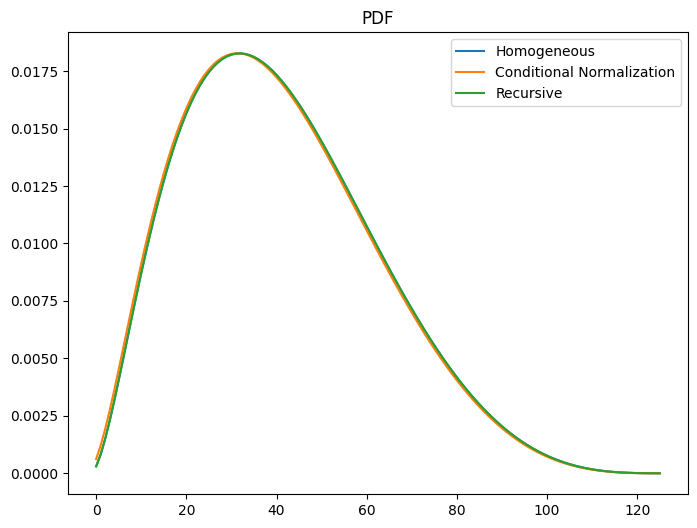

In [89]:
import matplotlib.pyplot as plt

B = (1 - R) * holding

x = list(range(126))
y = [default_prob(xx, 10) for xx in x]
z = [quad(lambda X_M: excess_loss_Cond_pdf(10, X_M, xx, B) * math.exp(- X_M ** 2 / 2) / math.sqrt(2 * math.pi), -np.inf, np.inf)[0] for xx in x]
w = [excess_loss_Recursive_onx(10, xx) - excess_loss_Recursive_onx(10, xx - 1) * (xx > 0) for xx in x]

plt.figure(figsize=(8, 6))
plt.plot(x, y, label="Homogeneous")
plt.plot(x, z, label="Conditional Normalization")
plt.plot(x, w, label="Recursive")
plt.legend()
plt.title("PDF")
plt.show()

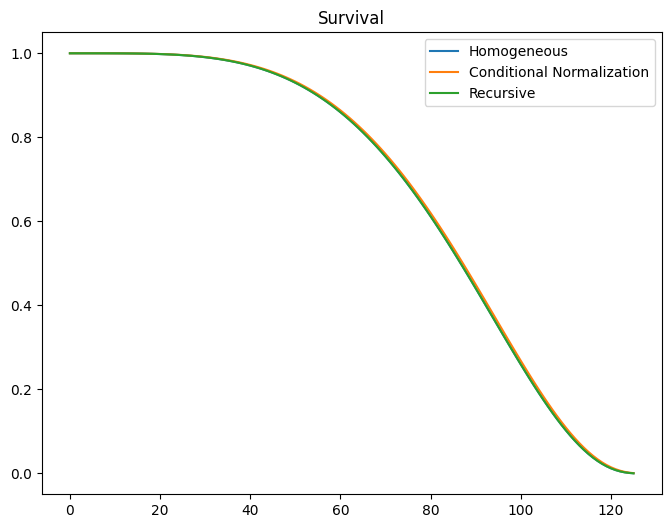

In [90]:
plt.figure(figsize=(8, 6))
plt.plot(x, np.cumsum(y)[::-1], label="Homogeneous")
plt.plot(x, np.cumsum(z)[::-1], label="Conditional Normalization")
plt.plot(x, np.cumsum(w)[::-1], label="Recursive")
plt.legend()
plt.title("Survival")
plt.show()

## Tranche

In [58]:
excess_loss_CondNorm(1, 0, 0.03)

110344.06423607402

In [86]:
excess_loss_CondNorm(1, -np.inf, 0.03)

1009579003.4142897